# **Encoding, Scaling, and Feature Selection**


### Lucía Poyan, Nuria Olmedilla y Claudia Gemeno

In this section, the dataset is transformed through encoding of categorical variables and scaling of numerical features. Additionally, the most relevant variables are selected using advanced techniques such as Lasso, Ridge, and Decision Trees, combining the best results to optimize the model.

### **Import libraries**

In [ ]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from collections import Counter
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, classification_report, make_scorer, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.decomposition import PCA 
import shap

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### **Data Loading: Handling Missing Values and Outliers**


In [ ]:
pd_credit_train = pd.read_csv(r"../content/credit_processed_train.csv")
pd_credit_test = pd.read_csv(r"../content/credit_processed_test.csv")

In [ ]:
# Set the random seed for reproducibility
seed = 42  

In [ ]:
pd_credit_train

,Unnamed: 0,sk_id_curr,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,target
0,73346.0,185046.0,Cash loans,F,N,Y,0.0,135000.0,269550.0,21739.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-11803.0,-2143.0,-3347.0,-3649.0,9.0,True,True,False,True,False,False,Drivers,2.0,2,2,5,10.0,False,False,False,False,True,True,Military,0.385796,0.654013,0.546023,0.0887,0.0764,0.9816,0.7552,0.0211,0.0,0.1379,0.1667,0.2083,0.0486,0.0756,0.0751,0.0000,0.00370,0.0840,0.0745,0.9816,0.7648,0.0190,0.0,0.1379,0.1667,0.2083,0.0461,0.0762,0.0733,0.0000,0.0012,0.0874,0.0760,0.9816,0.7585,0.0209,0.0,0.1379,0.1667,0.2083,0.0490,0.0761,0.0756,0.0000,0.00310,No especificado,No especificado,0.0689,No especificado,No especificado,0.0,0.0,0.0,0.0,-1596.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,1.0,3.0,False
1,54904.0,163616.0,Cash loans,F,N,Y,2.0,90000.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018850,-12392.0,-2484.0,-3414.0,-4071.0,9.0,True,True,True,True,False,False,Sales staff,4.0,2,2,1,9.0,False,False,False,False,False,False,Self-employed,0.519302,0.543995,0.639708,0.0887,0.0764,0.9816,0.7552,0.0211,0.0,0.1379,0.1667,0.2083,0.0486,0.0756,0.0751,0.0000,0.00370,0.0840,0.0745,0.9816,0.7648,0.0190,0.0,0.1379,0.1667,0.2083,0.0461,0.0762,0.0733,0.0000,0.0012,0.0874,0.0760,0.9816,0.7585,0.0209,0.0,0.1379,0.1667,0.2083,0.0490,0.0761,0.0756,0.0000,0.00310,No especificado,No especificado,0.0689,No especificado,No especificado,6.0,0.0,5.0,0.0,-2711.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,1.0,False
2,39606.0,145853.0,Cash loans,M,Y,N,1.0,270000.0,292500.0,28930.5,2

In [ ]:
X_train = pd_credit_train.drop('target', axis=1)
y_train = pd_credit_train['target']
X_test = pd_credit_test.drop('target', axis=1)
y_test = pd_credit_test['target']



### **Variable Encoding**

To encode categorical variables, we have used three distinct approaches based on the type of variable and the number of unique values they contain. Below is an explanation of each approach:


1.   Binary Variables (Yes/No):
For categorical variables with only two possible values, such as "Y" and "N" (e.g., ``flag_own_car``, ``flag_own_realty``), we performed manual encoding. In this case, we assigned the value 1 to "Y" and the value 0 to "N". This way, the variables are transformed into binary numerical values that are easier for the models to process.



2.   Variables with Few Categories (One-Hot Encoding):
For variables containing a limited number of categories, such as ``name_contract_type`` or ``fondkapremont_mode``, we used One-Hot Encoding. This method creates new binary columns for each unique category of the variable. Since these variables have a small number of unique values, the use of One-Hot Encoding does not generate an excessive number of columns, making it an efficient choice.

3. Variables with Many Unique Values (Target Encoding):
For variables with a higher number of unique values, such as ``occupation_type`` or ``name_housing_type``, we opted for Target Encoding. This approach replaces each category with the mean of the target variable (``target``) for that category. Since these variables have many categories, Target Encoding is more suitable, as it prevents excessive expansion of the number of columns in the dataset, which could occur with One-Hot Encoding.


In [ ]:
# Encoding X_train

X_train['flag_own_car'] = X_train['flag_own_car'].map({'Y': 1, 'N': 0})
X_train['flag_own_realty'] = X_train['flag_own_realty'].map({'Y': 1, 'N': 0})
X_train['emergencystate_mode'] = X_train['emergencystate_mode'].map({'Yes': 1, 'No': 0})

X_train = pd.get_dummies(X_train, columns=['name_contract_type', 'code_gender',
                                           'name_education_type', 'emergencystate_mode', 'housetype_mode',
                                           'fondkapremont_mode', 'organization_type'])


target_encoder = TargetEncoder(cols=['name_type_suite', 'name_income_type',
                                     'occupation_type', 'wallsmaterial_mode',
                                     'name_family_status', 'name_housing_type',
                                     'weekday_appr_process_start'])

X_train = target_encoder.fit_transform(X_train, y_train)



In [ ]:
# Encoding X_test

X_test['flag_own_car'] = X_test['flag_own_car'].map({'Y': 1, 'N': 0})
X_test['flag_own_realty'] = X_test['flag_own_realty'].map({'Y': 1, 'N': 0})
X_test['emergencystate_mode'] = X_test['emergencystate_mode'].map({'Yes': 1, 'No': 0})

X_test = pd.get_dummies(X_test, columns=['name_contract_type', 'code_gender',
                                           'name_education_type', 'housetype_mode',
                                           'fondkapremont_mode', 'organization_type'])

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

X_test = target_encoder.transform(X_test)


In [ ]:
X_train

,Unnamed: 0,sk_id_curr,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,totalarea_mode,wallsmaterial_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,name_contract_type_Cash loans,name_contract_type_Revolving loans,code_gender_F,code_gender_M,code_gender_XNA,name_education_type_Academic degree,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,emergencystate_mode_0.0,emergencystate_mode_1.0,housetype_mode_No especificado,housetype_mode_block of flats,housetype_mode_specific housing,housetype_mode_terraced house,fondkapremont_mode_No especificado,fondkapremont_mode_not specified,fondkapremont_mode_org spec account,fondkapremont_mode_reg oper account,fondkapremont_mode_reg oper spec account,organization_type_Advertising,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Sec

### **Scaling Variables**

The scaling process adjusts the range and distribution of features so they all have similar scales. In the case of StandardScaler, it transforms the data by centering it around a mean of 0 and scaling it to a standard deviation of 1. This ensures that features with larger ranges (e.g., income vs. age) do not dominate the model's learning process. It's crucial for models like SVM, k-NN, or logistic regression, where the magnitude of the features affects the model’s performance.

In [ ]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train_scaled.describe()


,Unnamed: 0,sk_id_curr,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,totalarea_mode,wallsmaterial_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,name_contract_type_Cash loans,name_contract_type_Revolving loans,code_gender_F,code_gender_M,code_gender_XNA,name_education_type_Academic degree,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,emergencystate_mode_0.0,emergencystate_mode_1.0,housetype_mode_No especificado,housetype_mode_block of flats,housetype_mode_specific housing,housetype_mode_terraced house,fondkapremont_mode_No especificado,fondkapremont_mode_not specified,fondkapremont_mode_org spec account,fondkapremont_mode_reg oper account,fondkapremont_mode_reg oper spec account,organization_type_Advertising,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Sec

## **FEATURE SELECTION**


We examined the distribution of the target variable and found a significant class imbalance, with 92% in class 0 and only 8% in class 1. This imbalance could lead to problems in model performance, so we decided to apply oversampling using SMOTE to balance the classes.

In [ ]:
# Check the class distribution in percentage and confirm that it is imbalanced
y_train.value_counts(normalize=True) * 100


target
False    91.946188
True      8.053812
Name: proportion, dtype: float64

In [ ]:
# Initialize SMOTE with a fixed random seed for reproducibility
smote = SMOTE(random_state=seed)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Verify the new class distribution
print("Class distribution after SMOTE:", Counter(y_train_balanced))


Class distribution after SMOTE: Counter({False: 61375, True: 61375})


After numerous tests with different methods, we have decided to perform the first stage of feature selection using Lasso, Ridge, and Decision Tree methods. We will combine the features selected by all three methods.

### **Variable selection with Lasso**

In [ ]:
sel_lasso = SelectFromModel(
    LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=seed)
)
sel_lasso.fit(X_train_balanced, y_train_balanced)

selected_features_lasso = X_train_balanced.columns[sel_lasso.get_support()]
print("Variables selected by Lasso:", selected_features_lasso)


Variables selected by Lasso: Index(['Unnamed: 0', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price',
       'name_type_suite', 'name_income_type',
       ...
       'organization_type_Trade: type 3', 'organization_type_Trade: type 4',
       'organization_type_Trade: type 5', 'organization_type_Trade: type 6',
       'organization_type_Trade: type 7',
       'organization_type_Transport: type 1',
       'organization_type_Transport: type 2',
       'organization_type_Transport: type 3',
       'organization_type_Transport: type 4', 'organization_type_University'],
      dtype='object', length=172)


In [ ]:
# Get the coefficients from the Lasso model
df_coefficients_lasso = pd.DataFrame({
    'predictor': X_train_balanced.columns,
    'coef': sel_lasso.estimator_.coef_.flatten() 
})

# Sort the coefficients by absolute value
df_coefficients_lasso['abs_coef'] = np.abs(df_coefficients_lasso['coef'])
df_coefficients_lasso = df_coefficients_lasso.sort_values(by='abs_coef', ascending=False)


In these plots, we can visually identify the most important variables selected by Lasso.

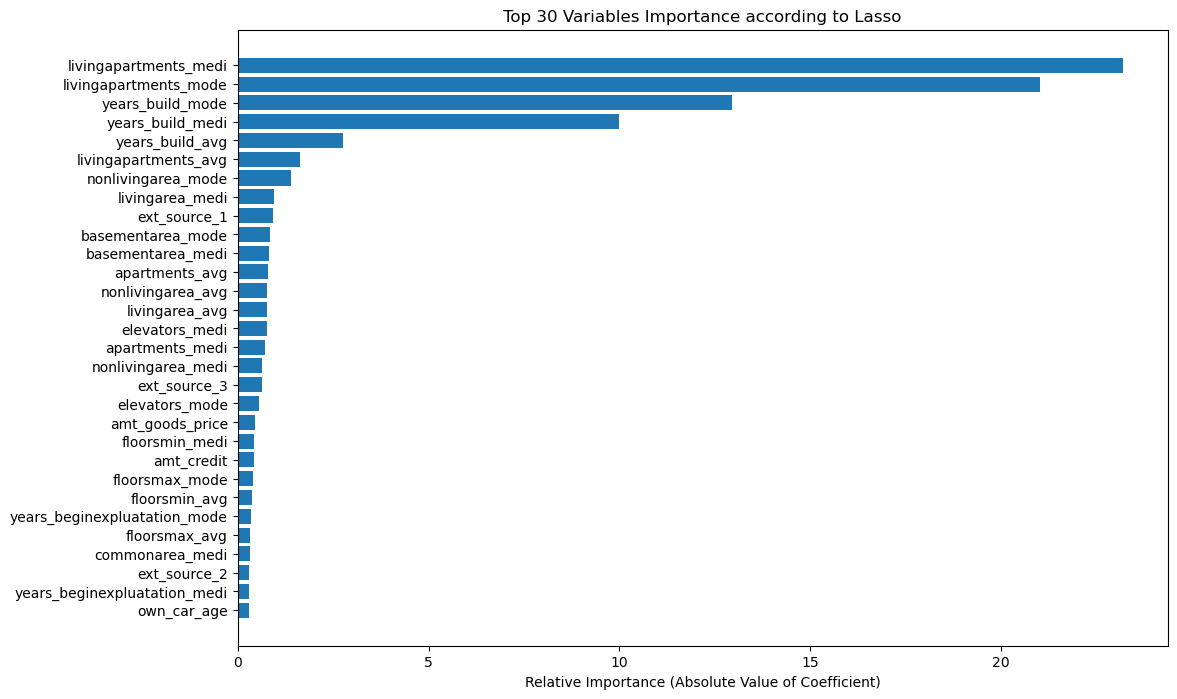

In [ ]:
# Limit to the top 30 most important variables
top_n = 30
df_coefficients_lasso_top = df_coefficients_lasso.head(top_n)

plt.figure(figsize=(12, 8))
plt.barh(np.arange(len(df_coefficients_lasso_top)), df_coefficients_lasso_top['abs_coef'], align='center')
plt.yticks(np.arange(len(df_coefficients_lasso_top)), df_coefficients_lasso_top['predictor'])
plt.gca().invert_yaxis() 
plt.xlabel('Relative Importance (Absolute Value of Coefficient)')
plt.title(f'Top {top_n} Variables Importance according to Lasso')
plt.show()


When using Lasso for feature selection, we observed that the importance scale appeared to be very skewed, with only two variables showing significant importance. This could be due to the wide range of coefficient values, making it hard to visualize the relative importance of the features. To address this, we applied a logarithmic scale to the coefficients to better highlight the more relevant features and improve the visualization of the variable importance distribution.

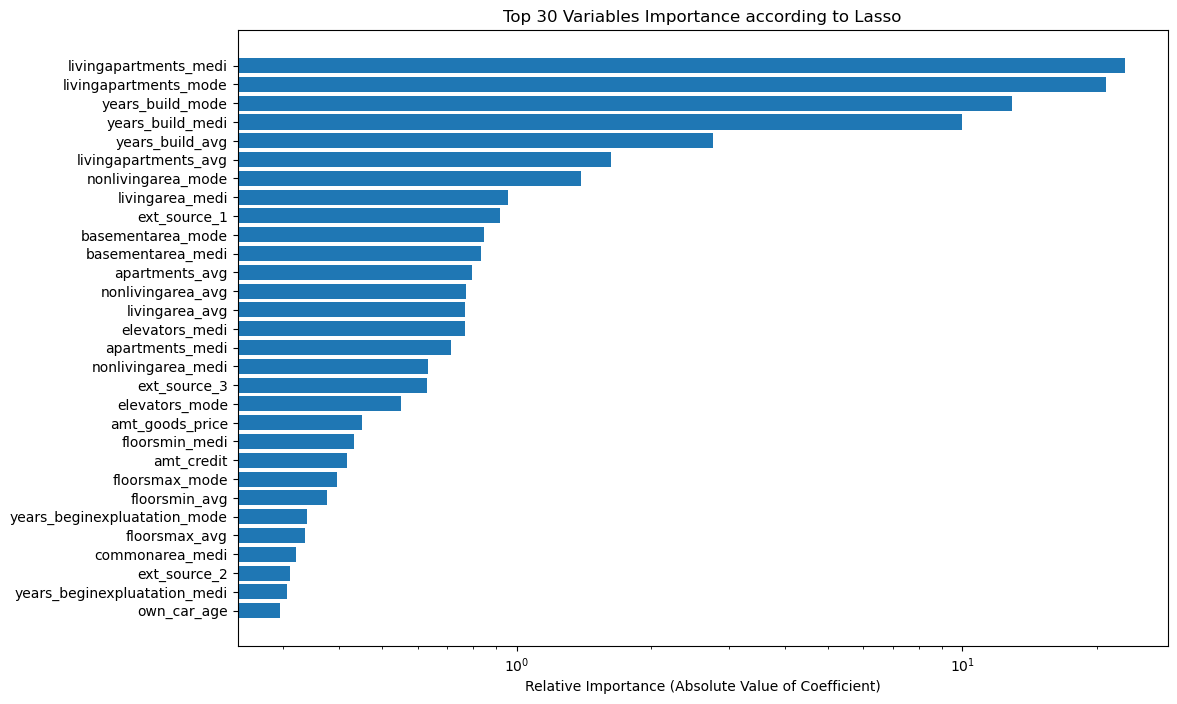

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(np.arange(len(df_coefficients_lasso_top)), df_coefficients_lasso_top['abs_coef'], align='center')
plt.yticks(np.arange(len(df_coefficients_lasso_top)), df_coefficients_lasso_top['predictor'])
plt.gca().invert_yaxis()  
plt.xlabel('Relative Importance (Absolute Value of Coefficient)')
plt.title(f'Top {top_n} Variables Importance according to Lasso')

# Apply logarithmic scale on the x-axis
plt.xscale('log')
plt.show()

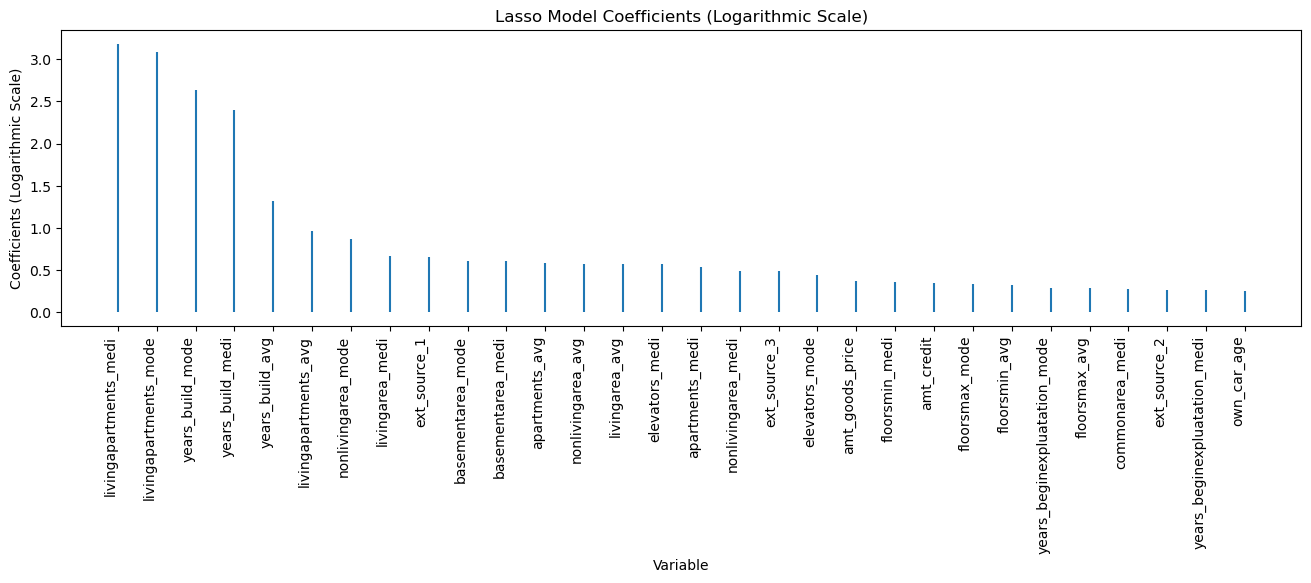

In [ ]:
# STEM Plot

fig, ax = plt.subplots(figsize=(16, 3.84))
log_coef = np.log1p(np.abs(df_coefficients_lasso_top['coef']))  
ax.stem(df_coefficients_lasso_top['predictor'], log_coef, markerfmt=' ', basefmt=' ')

ax.set_xlabel('Variable')
ax.set_ylabel('Coefficients (Logarithmic Scale)')
ax.set_title('Lasso Model Coefficients (Logarithmic Scale)')
plt.xticks(rotation=90, ha='right', size=10)
plt.show()

This analysis highlights that the most influential variables in the model are those associated with apartment characteristics (``livingapartments_medi``, ``livingapartments_mode``) and construction years (``years_build_mode``, ``years_build_medi``). These variables exhibit the highest impact on the model's predictions.

Additionally, other notable factors include ``ext_source_1`` (potentially representing an external information source), ``amt_goods_price``, and ``amt_credit`` (both tied to financial aspects), as well as variables related to non-living spaces and basements (``basementarea_mode``, ``nonlivingarea_mode``).

Identifying these key variables provides valuable insights into the factors driving the Lasso regression model. 

### **Variable selection with Decision Tree**


In [ ]:
tree = DecisionTreeClassifier(random_state=seed)
tree.fit(X_train_balanced, y_train_balanced)

selected_features_tree = X_train_balanced.columns[tree.feature_importances_ > tree.feature_importances_.mean()]
print("Variables selected by Decision Tree:", selected_features_tree)

Variables selected by Decision Tree: Index(['flag_own_car', 'own_car_age', 'ext_source_1', 'commonarea_avg',
       'years_build_mode', 'fondkapremont_mode_No especificado'],
      dtype='object')


Visual representation of the trained decision tree

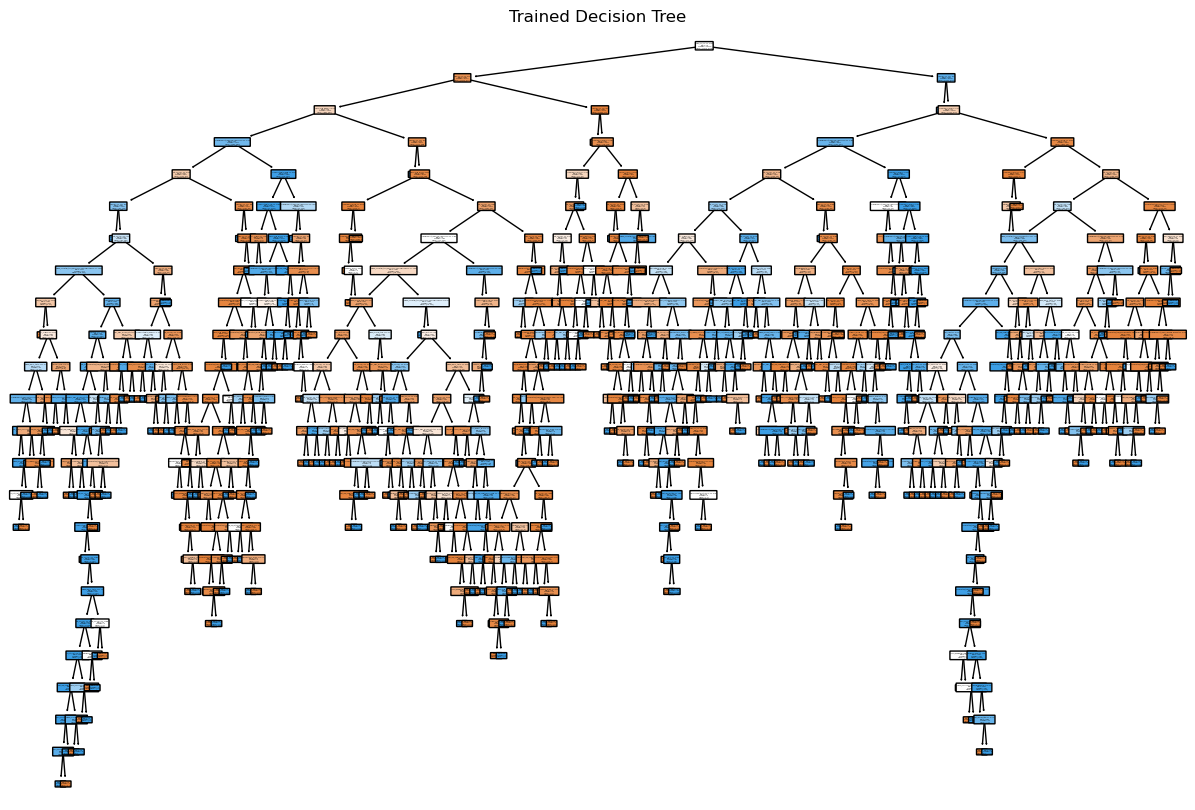

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(tree, 
          feature_names=list(X_train_balanced.columns), 
          class_names=[str(i) for i in tree.classes_],
          filled=True, 
          rounded=True)

plt.title("Trained Decision Tree")
plt.show()



The decision tree reflects the model's complexity due to the large number of variables included, showcasing the richness and diversity of the dataset and its ability to capture relevant nuances. The most important variables, such as those related to apartments and construction years, appear near the root of the tree, indicating their high influence on the model as they are used in the first splits. Although the tree may initially seem dense, it provides a clear representation of the decision-making process through splits based on specific variable thresholds, making it easier to analyze.

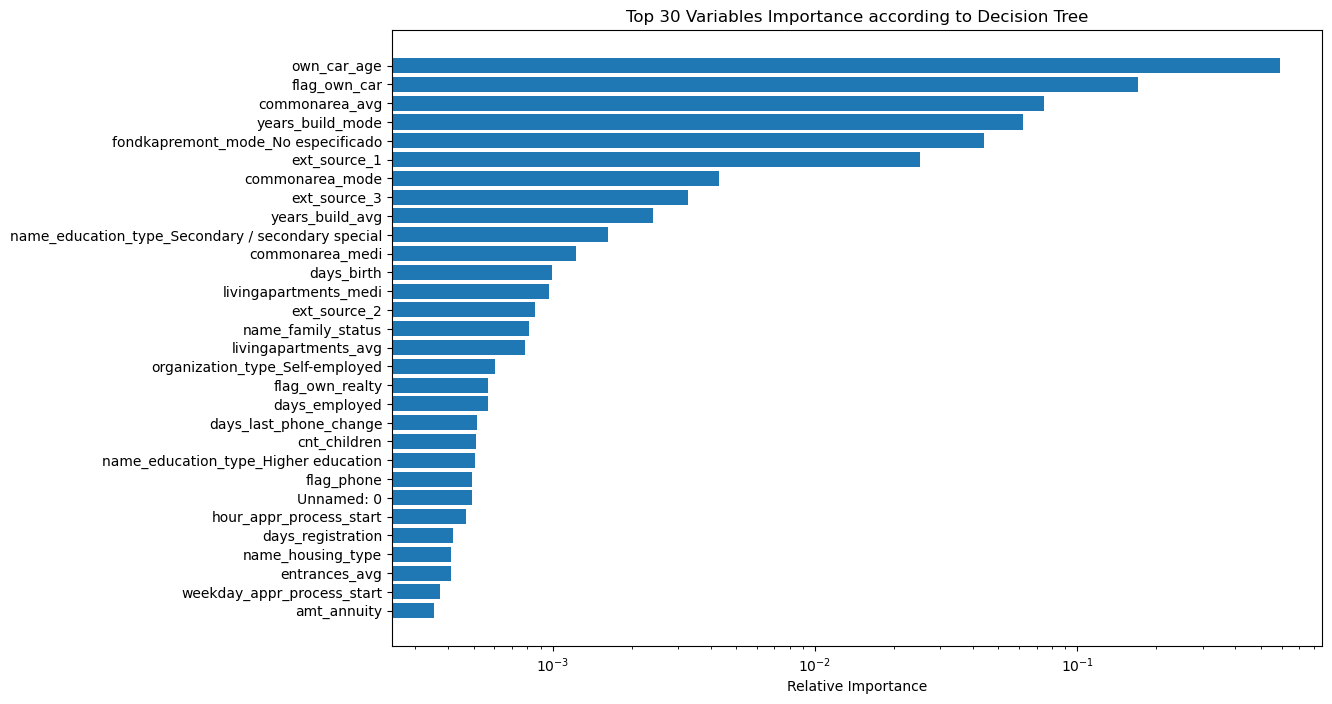

In [ ]:
# Feature Importance

importances_tree = tree.feature_importances_

df_tree_importances = pd.DataFrame({
    'predictor': list(X_train_balanced.columns),
    'importance': importances_tree
})

df_tree_importances = df_tree_importances.sort_values(by='importance', ascending=False)

# Limit to the top 30 most important variables
top_n_tree = 30
df_tree_importances_top = df_tree_importances.head(top_n_tree)

plt.figure(figsize=(12, 8))
plt.barh(np.arange(len(df_tree_importances_top)), df_tree_importances_top['importance'], align='center')
plt.yticks(np.arange(len(df_tree_importances_top)), df_tree_importances_top['predictor'])
plt.xlabel('Relative Importance')
plt.title(f'Top {top_n_tree} Variables Importance according to Decision Tree')

# Apply logarithmic scale on the x-axis
plt.xscale('log')
plt.gca().invert_yaxis()  
plt.show()


The decision tree analysis highlights the most critical factors influencing the model's predictions. Among these, the age of the owned car and car ownership emerge as key drivers. Additionally, features related to common areas, the construction year of the property, and external information sources play a significant role.

### **Variable selection with Ridge**


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_balanced, y_train_balanced)

selector_ridge = SelectFromModel(ridge, threshold="mean", max_features=20)
selector_ridge.fit(X_train_balanced, y_train_balanced)

selected_features_ridge = X_train_balanced.columns[selector_ridge.get_support()]
print("Variables selected by Ridge:", selected_features_ridge)

Variables selected by Ridge: Index(['Unnamed: 0', 'sk_id_curr', 'days_employed', 'flag_emp_phone',
       'ext_source_1', 'apartments_avg', 'years_build_avg',
       'livingapartments_avg', 'basementarea_mode', 'years_build_mode',
       'elevators_mode', 'livingapartments_mode', 'livingarea_mode',
       'apartments_medi', 'basementarea_medi', 'years_build_medi',
       'entrances_medi', 'livingapartments_medi', 'livingarea_medi',
       'organization_type_XNA'],
      dtype='object')


In [ ]:
ridge_coefficients = ridge.coef_

df_coefficients_ridge = pd.DataFrame({
    'predictor': list(X_train_balanced.columns),  
    'coef': ridge_coefficients
})

df_coefficients_ridge['abs_coef'] = np.abs(df_coefficients_ridge['coef'])
df_coefficients_ridge = df_coefficients_ridge.sort_values(by='abs_coef', ascending=False)


In these plots, we can visually identify the most important variables selected by Ridge

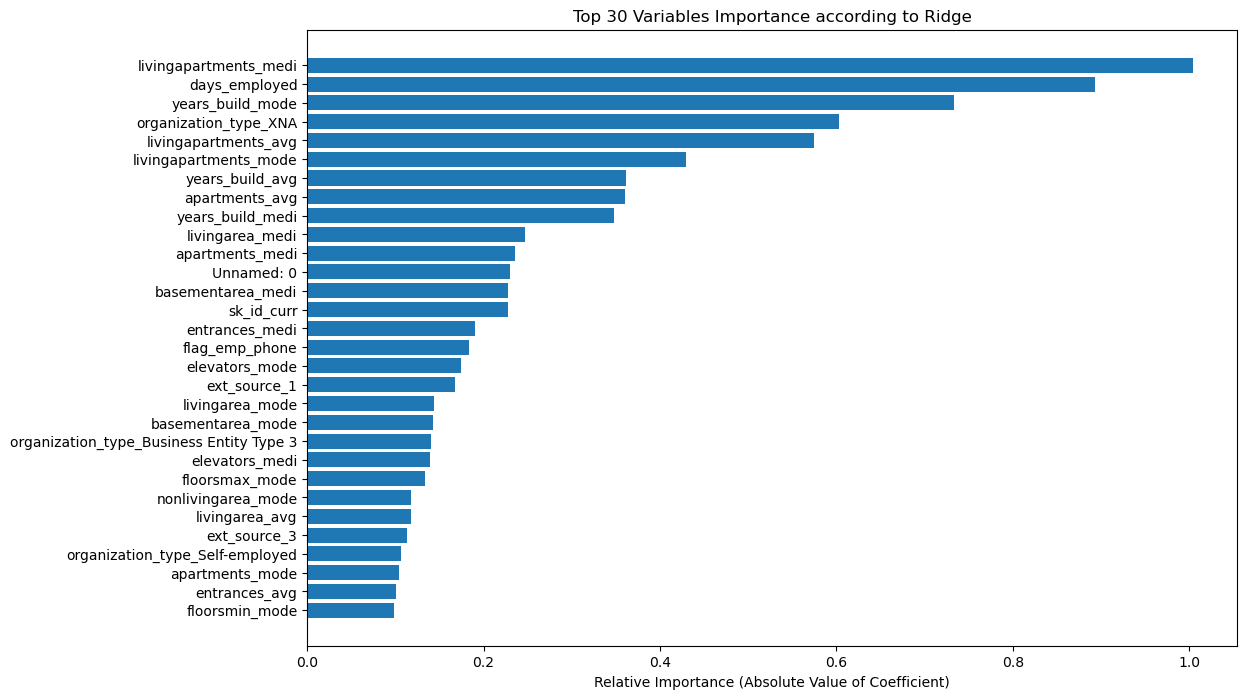

In [ ]:
# Limit to the top 30 most important variables
top_n_ridge = 30
df_coefficients_ridge_top = df_coefficients_ridge.head(top_n_ridge)

plt.figure(figsize=(12, 8))
plt.barh(np.arange(len(df_coefficients_ridge_top)), df_coefficients_ridge_top['abs_coef'], align='center')
plt.yticks(np.arange(len(df_coefficients_ridge_top)), df_coefficients_ridge_top['predictor'])
plt.xlabel('Relative Importance (Absolute Value of Coefficient)')
plt.title(f'Top {top_n_ridge} Variables Importance according to Ridge')
plt.gca().invert_yaxis() 
plt.show()


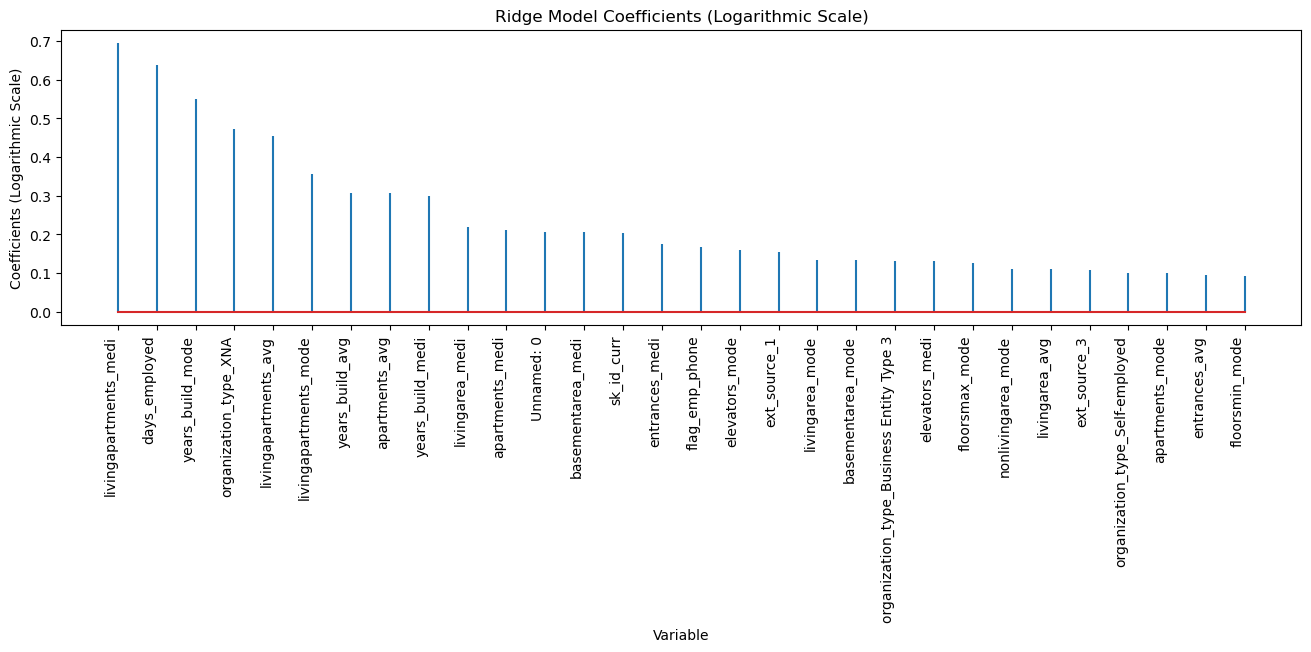

In [ ]:
# Stem plot with logarithmic scale
fig, ax = plt.subplots(figsize=(16, 3.84))

log_coef = np.log1p(np.abs(df_coefficients_ridge_top['coef']))  # log(1+x) to avoid log(0)

ax.stem(df_coefficients_ridge_top['predictor'], log_coef, markerfmt=' ')
ax.set_xlabel('Variable')
ax.set_ylabel('Coefficients (Logarithmic Scale)')
ax.set_title('Ridge Model Coefficients (Logarithmic Scale)')
plt.xticks(rotation=90, ha='right', size=10)
plt.show()


The Ridge model coefficients plot (on a logarithmic scale) shows the influence of various variables in the regression model. The most important variables, based on the highest coefficients, are livingapartments_medi (the average number of apartments in an area), days_employed (the number of days employed or years of work experience), and years_build_mode (the number of years since a property was built or the construction type). These variables have the greatest impact on the model's predictions, as reflected in their higher coefficients.


We decided that the best option is to keep all the variables selected by our methods to ensure a more robust model. This approach allows us to capture the full set of important features identified by Ridge, Lasso, and the Decision Tree, improving the model's ability to make accurate predictions.

In [ ]:
# Variables selected by Lasso, Ridge, and Decision Tree
lasso_selected = set(selected_features_lasso)
ridge_selected = set(selected_features_ridge)
tree_selected = set(selected_features_tree)

# Combine all selected variables
all_selected_features = lasso_selected.union(ridge_selected).union(tree_selected)

print(f"Variables selected by Lasso, Ridge, and Decision Tree: {len(all_selected_features)}")


Variables selected by Lasso, Ridge, and Decision Tree: 176


In [ ]:
selected_features_list = list(all_selected_features)

# Select the variables
X_train_selected = X_train_balanced[selected_features_list]
X_test_selected = X_test_scaled[selected_features_list]


Ridge, Lasso, and Decision Tree are the methods we have used for feature selection. Ridge reduces the influence of less relevant variables but does not eliminate them completely. Lasso, on the other hand, removes the least impactful variables by setting their coefficients to zero. Lastly, the Decision Tree selects the variables that best split the data, using splits based on the importance of features for classification.

### **PCA for dimensionality reduction**


After combining the results from the methods we've chosen, we concluded that there are still too many variables. Therefore, we decided to apply PCA to further reduce the dimensionality of the dataset.

In [ ]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

print(f"Number of principal components retained: {pca.n_components_}")
print(f"Shape of the transformed data: {X_train_pca.shape}")


Number of principal components retained: 125
Shape of the transformed data: (122750, 125)


It can be observed that after applying PCA, we reduced the number of components from 176 (which were selected by our methods) to 125 components.

In [ ]:
num_pcs_to_display = 10 

# Get the loadings of the principal components
pca_components = pd.DataFrame(
    pca.components_, 
    columns=X_train_selected.columns, 
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Show the 5 most influential variables for the selected number of principal components
top_features_per_pc = {}
for pc in pca_components.index[:num_pcs_to_display]:
    top_features = pca_components.loc[pc].abs().nlargest(5).index 
    top_features_per_pc[pc] = top_features

print("Most influential variables per principal component:")
for pc, features in top_features_per_pc.items():
    print(f"{pc}: {list(features)}")


Most influential variables per principal component:
PC1: ['livingarea_avg', 'livingarea_medi', 'livingarea_mode', 'apartments_avg', 'totalarea_mode']
PC2: ['organization_type_XNA', 'flag_emp_phone', 'days_employed', 'name_income_type', 'days_birth']
PC3: ['emergencystate_mode_0.0', 'housetype_mode_block of flats', 'wallsmaterial_mode', 'fondkapremont_mode_No especificado', 'ext_source_2']
PC4: ['years_beginexpluatation_medi', 'years_beginexpluatation_avg', 'years_beginexpluatation_mode', 'years_build_medi', 'years_build_avg']
PC5: ['years_beginexpluatation_medi', 'years_beginexpluatation_avg', 'years_beginexpluatation_mode', 'amt_goods_price', 'amt_credit']
PC6: ['amt_goods_price', 'amt_credit', 'amt_annuity', 'years_beginexpluatation_medi', 'years_beginexpluatation_avg']
PC7: ['reg_region_not_work_region', 'reg_region_not_live_region', 'live_region_not_work_region', 'reg_city_not_work_city', 'reg_city_not_live_city']
PC8: ['nonlivingapartments_mode', 'nonlivingapartments_medi', 'nonli

In [ ]:
X_train_selected.to_csv(r'../content/X_train_selected.csv', index=False)
X_test_selected.to_csv(r'../content/X_test_selected.csv', index=False)

X_train_pca_df = pd.DataFrame(X_train_pca)
X_test_pca_df = pd.DataFrame(X_test_pca)
X_train_pca_df.to_csv(r'../content/X_train_pca.csv', index=False)
X_test_pca_df.to_csv(r'../content/X_test_pca.csv', index=False)

y_train_balanced.to_csv(r'../content/y_train_balanced.csv', index=False)
y_test.to_csv(r'../content/y_test.csv', index=False)

components_df = pd.DataFrame(pca.components_, columns=X_train_selected.columns,
                             index=[f"PC{i+1}" for i in range(pca.components_.shape[0])])
components_df.to_csv(r'../content/components_pca.csv', index=True)


In this notebook, the final stages of preprocessing and feature selection were completed to optimize the dataset for modeling.

Categorical variables were encoded using techniques tailored to their nature, such as binary encoding, One-Hot Encoding, and Target Encoding, efficiently representing the categorical information without inflating dimensionalities unnecessarily. Next, the variables were scaled using StandardScaler, ensuring uniformity in the magnitude of the features.

To address the class imbalance in the target variable, SMOTE was applied, balancing the proportions and ensuring a less biased model. Feature selection combined Ridge, Lasso, and Decision Trees, resulting in a robust set of key variables.

Finally, to reduce dimensionality, PCA was implemented, reducing the selected features to a manageable number of principal components without losing most of the explained variance. This approach ensures a clean, scaled, and optimized dataset for building efficient predictive models.